In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


white_path = "wine-white.csv"
red_path = "wine-red.csv"

red_wine = pd.read_csv(red_path)
white_wine = pd.read_csv(white_path)

white_wine['label'] = 'default'
red_wine['label'] = 'default'


In [4]:
def labelWine(threshhold, wine_type, data): # function labels the white as being good or bad based on the threshhold value provided
    for index, row in data.iterrows():
        number = -1
        if wine_type == "red":
            number = 0
        
        elif wine_type == "white":
            number = 2
        
        
        
        quality = row['quality']
        if quality<threshhold: 
            data.at[index,'label'] = number
        else:
            data.at[index,'label'] = number+1
            
    return data


red_wine = labelWine(6, "red", red_wine)  #labeling the wine as being good or bad for both white and red whites
white_wine = labelWine(6, "white",white_wine)     

wine = pd.concat([red_wine,white_wine], ignore_index=True) #combining the red and white wine dataset after labeling 


    
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,3
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,3


# Clustering the dataset into 4 clusters  (KMeans)
- The goal is to have the data group itself into good white wine, good red white wine, bad white wine and bad red wine
- good and bad wine will be determined by its quality rating

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from IPython.display import Markdown

temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)


scores = {name: [] for name in ('auto', 'full', 'elkan')}


for algorithm in ('auto', 'full', 'elkan'):
    for seed in np.arange(0, 10):
        kmeans = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        kmeans.fit(feature)
        array = kmeans.labels_

        ARI_score = metrics.adjusted_rand_score(array,labels)
        scores[algorithm].append(ARI_score)
        print(algorithm, seed, ARI_score)

        


median_auto = np.median(np.array(scores['auto']))
median_full = np.median(np.array(scores['full']))
median_elkan = np.median(np.array(scores['elkan']))        


display(Markdown(\
f'|[]()|Median scores|\n{"|---"*2}|\n'
f'|**auto**|{median_auto:.4}|\n'
f'|**full**|{median_full:.4}|\n'
f'|**elkan**|{median_elkan:.4}|\n')) 
        
        
        


auto 0 0.1790886139178354
auto 1 0.17916415799812466
auto 2 0.1792577499620072
auto 3 0.17901233887814302
auto 4 0.17902706339533264
auto 5 0.17919798644423574
auto 6 0.17892223680057928
auto 7 0.17919798644423574
auto 8 0.1795126908651767
auto 9 0.1792795183615587
full 0 0.1790886139178354
full 1 0.17916415799812466
full 2 0.1792577499620072
full 3 0.17901233887814302
full 4 0.17902706339533264
full 5 0.17919798644423574
full 6 0.17892223680057928
full 7 0.17919798644423574
full 8 0.1795126908651767
full 9 0.1792795183615587
elkan 0 0.1790886139178354
elkan 1 0.17916415799812466
elkan 2 0.1792577499620072
elkan 3 0.17901233887814302
elkan 4 0.17902706339533264
elkan 5 0.17919798644423574
elkan 6 0.17892223680057928
elkan 7 0.17919798644423574
elkan 8 0.1795126908651767
elkan 9 0.1792795183615587


|[]()|Median scores|
|---|---|
|**auto**|0.1792|
|**full**|0.1792|
|**elkan**|0.1792|


In [ ]:
zero = np.count_nonzero(array==0)
one = np.count_nonzero(array==1)
two = np.count_nonzero(array==2)
three = np.count_nonzero(array==3)

clusters = ['1', '2', '3', '4']
count = [zero, one, two, three]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,count)

plt.show()


# DBSCAN
- test differnt eps values with different min_samples values and plot the results
- find the combination that provides the highest score 

max value is: 0
eps:  16
min_samples:  240


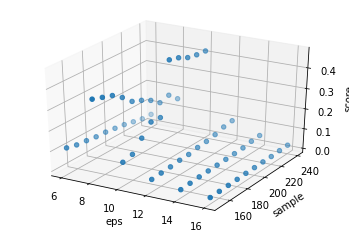

In [51]:
from sklearn.cluster import DBSCAN


xs = []
ys = []
zs = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
max_value = 0 
max_eps = -5
samples_ = -5

for eps in range(6,18,2):
        for samples in range(150, 250, 10):
            
            xs.append(eps)
            ys.append(samples)
            
            db = DBSCAN (eps = eps , min_samples = samples)
            db.fit(feature)
            labels = db.labels_
            ARI_score = metrics.adjusted_rand_score(array,labels)
            zs.append(ARI_score)
            if ARI_score > max_value:
                max_eps = ARI_score
                max_eps = eps
                samples_ = samples


            
print("max value is:", max_value)
print("eps: ", max_eps)
print("min_samples: ", samples_)


ax.scatter(xs, ys, zs)
ax.set_xlabel('eps')
ax.set_ylabel('sample')
ax.set_zlabel('score')

plt.show()
